# Customer Retention Analysis: Data Exploration & Foundation

**Author:** Harpinder Singh  
**Dataset:** UCI Online Retail II (UK E-Commerce)  
**Objective:** Build foundation for probabilistic CLV modeling and churn prediction

---

## Table of Contents
1. [Environment Setup](#1.-Environment-Setup)
2. [Data Loading & Initial Inspection](#2.-Data-Loading-&-Initial-Inspection)
3. [Data Quality Assessment](#3.-Data-Quality-Assessment)
4. [Data Cleaning & Preprocessing](#4.-Data-Cleaning-&-Preprocessing)
5. [Exploratory Data Analysis](#5.-Exploratory-Data-Analysis)
6. [Temporal Split Creation](#6.-Temporal-Split-Creation)
7. [RFM Feature Engineering](#7.-RFM-Feature-Engineering)
8. [Export Processed Data](#8.-Export-Processed-Data)

---

## 1. Environment Setup

╔════════════════════════════════════════════════════════════════╗
║                    ENVIRONMENT CONFIGURATION                    ║
╚════════════════════════════════════════════════════════════════╝

In [1]:
# Standard library imports
import warnings
from pathlib import Path
from datetime import datetime, timedelta

# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("✅ Environment configured successfully")
print(f"   Pandas version: {pd.__version__}")
print(f"   NumPy version: {np.__version__}")

✅ Environment configured successfully
   Pandas version: 2.3.3
   NumPy version: 1.26.4


In [2]:
# ┌────────────────────────────────────────────────────────────┐
# │ Directory Structure Setup                                  │
# └────────────────────────────────────────────────────────────┘

# Define project root (handles execution from different directories)
PROJECT_ROOT = Path.cwd()
if PROJECT_ROOT.name == 'notebooks':
    PROJECT_ROOT = PROJECT_ROOT.parent

# Define all project directories
DIR_DATA_RAW = PROJECT_ROOT / 'data' / 'raw'
DIR_DATA_PROCESSED = PROJECT_ROOT / 'data' / 'processed'
DIR_MODELS = PROJECT_ROOT / 'models'
DIR_RESULTS = PROJECT_ROOT / 'results'
DIR_FIGURES = PROJECT_ROOT / 'results' / 'figures'

# Create directories if they don't exist
for directory in [DIR_DATA_PROCESSED, DIR_MODELS, DIR_RESULTS, DIR_FIGURES]:
    directory.mkdir(parents=True, exist_ok=True)

print("✅ Directory structure verified")
print(f"   Project root: {PROJECT_ROOT}")
print(f"   Raw data: {DIR_DATA_RAW}")
print(f"   Processed data: {DIR_DATA_PROCESSED}")
print(f"   Figures: {DIR_FIGURES}")

✅ Directory structure verified
   Project root: d:\Courses\Workstation\Github\Working Projects\GitHub Project 3 - Customer Churn\Customer_Segmentation_Retention_Analysis
   Raw data: d:\Courses\Workstation\Github\Working Projects\GitHub Project 3 - Customer Churn\Customer_Segmentation_Retention_Analysis\data\raw
   Processed data: d:\Courses\Workstation\Github\Working Projects\GitHub Project 3 - Customer Churn\Customer_Segmentation_Retention_Analysis\data\processed
   Figures: d:\Courses\Workstation\Github\Working Projects\GitHub Project 3 - Customer Churn\Customer_Segmentation_Retention_Analysis\results\figures


---

## 2. Data Loading & Initial Inspection

╔════════════════════════════════════════════════════════════════╗
║                      DATA LOADING                               ║
╚════════════════════════════════════════════════════════════════╝

In [3]:
# ┌────────────────────────────────────────────────────────────┐
# │ Load Raw Data                                              │
# └────────────────────────────────────────────────────────────┘

# File path
file_path = DIR_DATA_RAW / 'Online Retail.xlsx'

print(f"Loading data from: {file_path}")
print("⏳ This may take 30-60 seconds...\n")

# Load Excel file
df_raw = pd.read_excel(file_path, engine='openpyxl')

print(f"✅ Data loaded successfully")
print(f"   Shape: {df_raw.shape}")
print(f"   Memory usage: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Loading data from: d:\Courses\Workstation\Github\Working Projects\GitHub Project 3 - Customer Churn\Customer_Segmentation_Retention_Analysis\data\raw\Online Retail.xlsx
⏳ This may take 30-60 seconds...

✅ Data loaded successfully
   Shape: (541909, 8)
   Memory usage: 134.93 MB


In [4]:
# ┌────────────────────────────────────────────────────────────┐
# │ Initial Data Inspection                                    │
# └────────────────────────────────────────────────────────────┘

print("Dataset Overview:")
print("="*80)
df_raw.info()

print("\n" + "="*80)
print("First 5 rows:")
print("="*80)
display(df_raw.head())

print("\n" + "="*80)
print("Statistical Summary:")
print("="*80)
display(df_raw.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB

First 5 rows:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom



Statistical Summary:


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.00,541909,541909.00,406829.00
mean,9.55,2011-07-04 13:34:57.156386048,4.61,15287.69
min,-80995.00,2010-12-01 08:26:00,-11062.06,12346.00
25%,1.00,2011-03-28 11:34:00,1.25,13953.00
50%,3.00,2011-07-19 17:17:00,2.08,15152.00
75%,10.00,2011-10-19 11:27:00,4.13,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,218.08,NaN,96.76,1713.60


In [5]:
# ┌────────────────────────────────────────────────────────────┐
# │ Column Analysis                                            │
# └────────────────────────────────────────────────────────────┘

print("Column Details:")
print("="*80)

for col in df_raw.columns:
    print(f"\n{col}:")
    print(f"  Type: {df_raw[col].dtype}")
    print(f"  Non-null: {df_raw[col].notna().sum():,} ({df_raw[col].notna().sum()/len(df_raw)*100:.2f}%)")
    print(f"  Unique: {df_raw[col].nunique():,}")
    
    if df_raw[col].dtype == 'object':
        print(f"  Sample values: {df_raw[col].dropna().unique()[:3].tolist()}")
    else:
        print(f"  Range: [{df_raw[col].min()}, {df_raw[col].max()}]")

Column Details:

InvoiceNo:
  Type: object
  Non-null: 541,909 (100.00%)
  Unique: 25,900
  Sample values: [536365, 536366, 536367]

StockCode:
  Type: object
  Non-null: 541,909 (100.00%)
  Unique: 4,070
  Sample values: ['85123A', 71053, '84406B']

Description:
  Type: object
  Non-null: 540,455 (99.73%)
  Unique: 4,223
  Sample values: ['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER']

Quantity:
  Type: int64
  Non-null: 541,909 (100.00%)
  Unique: 722
  Range: [-80995, 80995]

InvoiceDate:
  Type: datetime64[ns]
  Non-null: 541,909 (100.00%)
  Unique: 23,260
  Range: [2010-12-01 08:26:00, 2011-12-09 12:50:00]

UnitPrice:
  Type: float64
  Non-null: 541,909 (100.00%)
  Unique: 1,630
  Range: [-11062.06, 38970.0]

CustomerID:
  Type: float64
  Non-null: 406,829 (75.07%)
  Unique: 4,372
  Range: [12346.0, 18287.0]

Country:
  Type: object
  Non-null: 541,909 (100.00%)
  Unique: 38
  Sample values: ['United Kingdom', 'France', 'Australia']


---

## 3. Data Quality Assessment

╔════════════════════════════════════════════════════════════════╗
║                   DATA QUALITY ANALYSIS                         ║
╚════════════════════════════════════════════════════════════════╝

Missing Value Summary:


,Column,Missing_Count,Missing_Percentage
CustomerID,CustomerID,135080,24.93
Description,Description,1454,0.27


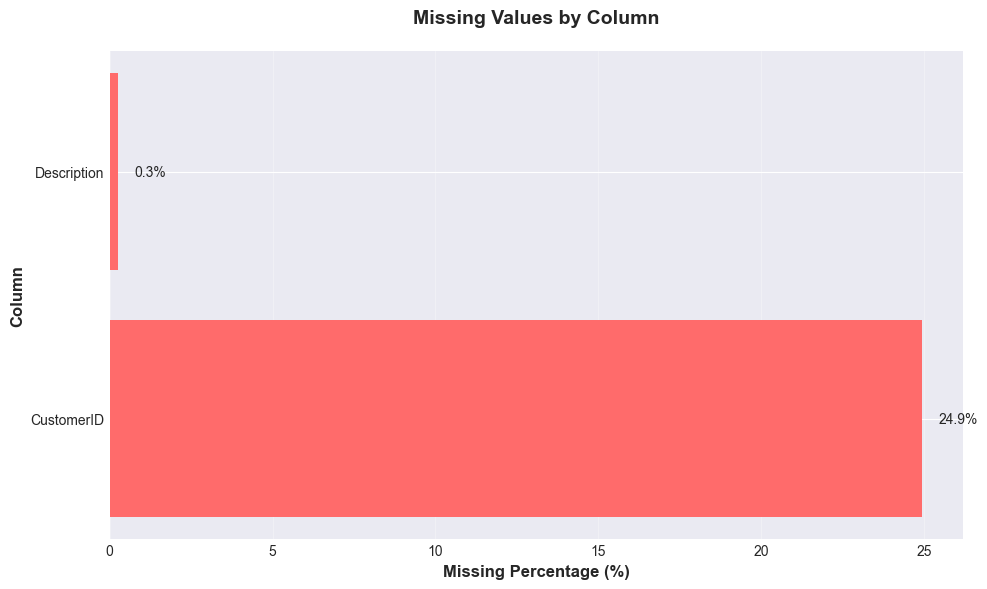

In [6]:
# ┌────────────────────────────────────────────────────────────┐
# │ Missing Value Analysis                                     │
# └────────────────────────────────────────────────────────────┘

missing_data = pd.DataFrame({
    'Column': df_raw.columns,
    'Missing_Count': df_raw.isnull().sum(),
    'Missing_Percentage': (df_raw.isnull().sum() / len(df_raw) * 100).round(2)
}).sort_values('Missing_Count', ascending=False)

print("Missing Value Summary:")
print("="*80)
display(missing_data[missing_data['Missing_Count'] > 0])

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
missing_data_plot = missing_data[missing_data['Missing_Count'] > 0]

if not missing_data_plot.empty:
    ax.barh(missing_data_plot['Column'], missing_data_plot['Missing_Percentage'], color='#FF6B6B')
    ax.set_xlabel('Missing Percentage (%)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Column', fontsize=12, fontweight='bold')
    ax.set_title('Missing Values by Column', fontsize=14, fontweight='bold', pad=20)
    ax.grid(axis='x', alpha=0.3)
    
    # Add percentage labels
    for i, (idx, row) in enumerate(missing_data_plot.iterrows()):
        ax.text(row['Missing_Percentage'] + 0.5, i, f"{row['Missing_Percentage']:.1f}%", 
                va='center', fontsize=10)
    
    plt.tight_layout()
    plt.savefig(DIR_FIGURES / '01_missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No missing values detected!")

In [7]:
# ┌────────────────────────────────────────────────────────────┐
# │ Duplicate Transaction Analysis                            │
# └────────────────────────────────────────────────────────────┘

duplicates = df_raw.duplicated().sum()
print(f"Duplicate Rows: {duplicates:,} ({duplicates/len(df_raw)*100:.2f}%)")

# Check for potential duplicate invoices
duplicate_invoices = df_raw.groupby('InvoiceNo').size()
print(f"\nUnique Invoices: {df_raw['InvoiceNo'].nunique():,}")
print(f"Total Transactions: {len(df_raw):,}")
print(f"Avg Items per Invoice: {len(df_raw) / df_raw['InvoiceNo'].nunique():.2f}")

Duplicate Rows: 5,268 (0.97%)

Unique Invoices: 25,900
Total Transactions: 541,909
Avg Items per Invoice: 20.92


In [8]:
# ┌────────────────────────────────────────────────────────────┐
# │ Data Anomaly Detection                                     │
# └────────────────────────────────────────────────────────────┘

print("Data Anomalies:")
print("="*80)

# Negative quantities (returns)
negative_qty = df_raw[df_raw['Quantity'] < 0]
print(f"\n1. Negative Quantities (Returns):")
print(f"   Count: {len(negative_qty):,} ({len(negative_qty)/len(df_raw)*100:.2f}%)")
print(f"   Unique Invoices: {negative_qty['InvoiceNo'].nunique():,}")

# Negative prices
negative_price = df_raw[df_raw['UnitPrice'] < 0]
print(f"\n2. Negative Unit Prices:")
print(f"   Count: {len(negative_price):,} ({len(negative_price)/len(df_raw)*100:.2f}%)")

# Zero prices
zero_price = df_raw[df_raw['UnitPrice'] == 0]
print(f"\n3. Zero Unit Prices:")
print(f"   Count: {len(zero_price):,} ({len(zero_price)/len(df_raw)*100:.2f}%)")
print(f"   Sample descriptions: {zero_price['Description'].dropna().unique()[:5].tolist()}")

# High quantity outliers
high_qty = df_raw[df_raw['Quantity'] > df_raw['Quantity'].quantile(0.99)]
print(f"\n4. High Quantity Outliers (>99th percentile):")
print(f"   Threshold: {df_raw['Quantity'].quantile(0.99):.0f} units")
print(f"   Count: {len(high_qty):,}")
print(f"   Max quantity: {df_raw['Quantity'].max():,.0f}")

Data Anomalies:

1. Negative Quantities (Returns):
   Count: 10,624 (1.96%)
   Unique Invoices: 5,172

2. Negative Unit Prices:
   Count: 2 (0.00%)

3. Zero Unit Prices:
   Count: 2,515 (0.46%)
   Sample descriptions: ['amazon', '?', 'ROUND CAKE TIN VINTAGE GREEN', 'check', 'damages']

4. High Quantity Outliers (>99th percentile):
   Threshold: 100 units
   Count: 4,950
   Max quantity: 80,995


Top 15 Countries by Transaction Count:


Country
United Kingdom     495478
Germany              9495
France               8557
EIRE                 8196
Spain                2533
Netherlands          2371
Belgium              2069
Switzerland          2002
Portugal             1519
Australia            1259
Norway               1086
Italy                 803
Channel Islands       758
Finland               695
Cyprus                622
Name: count, dtype: int64


United Kingdom transactions: 495,478 (91.43%)


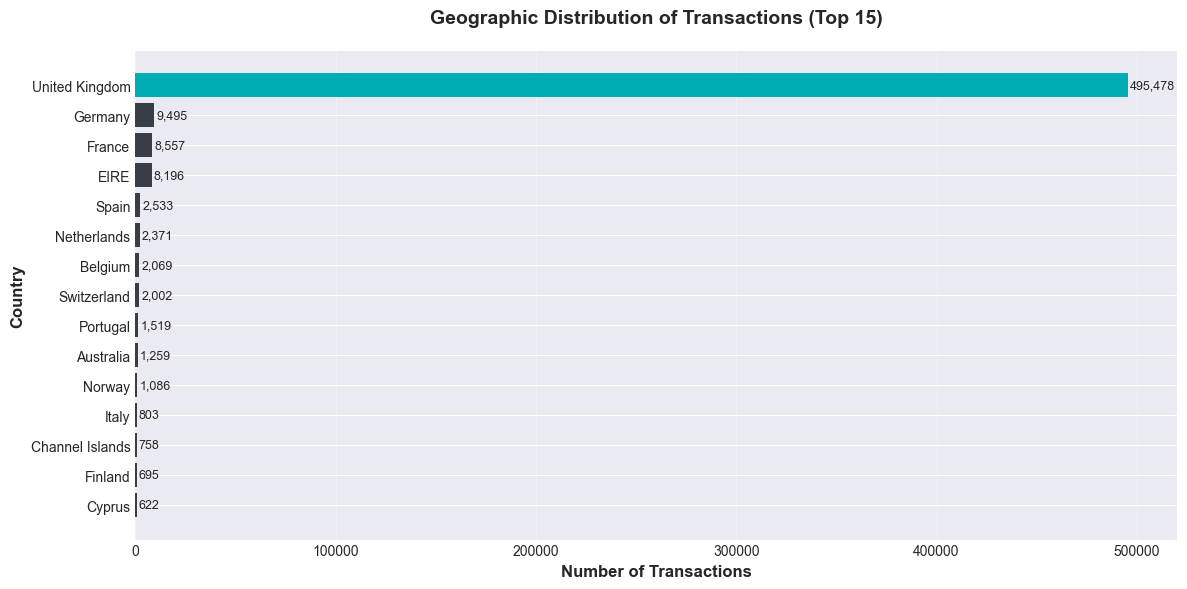

In [9]:
# ┌────────────────────────────────────────────────────────────┐
# │ Geographic Distribution                                    │
# └────────────────────────────────────────────────────────────┘

country_dist = df_raw['Country'].value_counts()

print("Top 15 Countries by Transaction Count:")
print("="*80)
display(country_dist.head(15))

print(f"\nUnited Kingdom transactions: {country_dist.get('United Kingdom', 0):,} ({country_dist.get('United Kingdom', 0)/len(df_raw)*100:.2f}%)")

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))
top_countries = country_dist.head(15)
colors = ['#00ADB5' if country == 'United Kingdom' else '#393E46' for country in top_countries.index]

ax.barh(range(len(top_countries)), top_countries.values, color=colors)
ax.set_yticks(range(len(top_countries)))
ax.set_yticklabels(top_countries.index)
ax.set_xlabel('Number of Transactions', fontsize=12, fontweight='bold')
ax.set_ylabel('Country', fontsize=12, fontweight='bold')
ax.set_title('Geographic Distribution of Transactions (Top 15)', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()

# Add value labels
for i, v in enumerate(top_countries.values):
    ax.text(v + 1000, i, f'{v:,}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig(DIR_FIGURES / '02_country_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

---

## 4. Data Cleaning & Preprocessing

╔════════════════════════════════════════════════════════════════╗
║                    DATA CLEANING PIPELINE                       ║
╚════════════════════════════════════════════════════════════════╝

### Cleaning Strategy:
1. Remove rows with missing CustomerID (required for customer-level analysis)
2. Filter to United Kingdom only (domain coherence)
3. Handle return transactions (negative quantities)
4. Remove invalid prices (negative or zero)
5. Create revenue column
6. Parse and validate datetime

In [10]:
# ┌────────────────────────────────────────────────────────────┐
# │ Data Cleaning Pipeline                                     │
# └────────────────────────────────────────────────────────────┘

# Start with a copy
df = df_raw.copy()
print(f"Starting shape: {df.shape}")
print("\nCleaning steps:")
print("="*80)

# Step 1: Remove missing CustomerID
initial_count = len(df)
df = df[df['CustomerID'].notna()]
print(f"1. Removed missing CustomerID: {initial_count - len(df):,} rows removed")
print(f"   Remaining: {len(df):,} rows")

# Step 2: Filter to UK only
initial_count = len(df)
df = df[df['Country'] == 'United Kingdom']
print(f"\n2. Filtered to UK market: {initial_count - len(df):,} rows removed")
print(f"   Remaining: {len(df):,} rows")

# Step 3: Remove invalid prices
initial_count = len(df)
df = df[df['UnitPrice'] > 0]
print(f"\n3. Removed invalid prices (≤0): {initial_count - len(df):,} rows removed")
print(f"   Remaining: {len(df):,} rows")

# Step 4: Separate returns from purchases
returns = df[df['Quantity'] < 0].copy()
purchases = df[df['Quantity'] > 0].copy()
print(f"\n4. Separated transactions:")
print(f"   Returns: {len(returns):,} rows ({len(returns)/len(df)*100:.2f}%)")
print(f"   Purchases: {len(purchases):,} rows ({len(purchases)/len(df)*100:.2f}%)")

# Step 5: Calculate revenue for purchases
purchases['Revenue'] = purchases['Quantity'] * purchases['UnitPrice']
print(f"\n5. Revenue column created")
print(f"   Total revenue: £{purchases['Revenue'].sum():,.2f}")
print(f"   Average transaction: £{purchases['Revenue'].mean():.2f}")

# Step 6: Convert CustomerID to integer
purchases['CustomerID'] = purchases['CustomerID'].astype(int)
print(f"\n6. CustomerID converted to integer")
print(f"   Unique customers: {purchases['CustomerID'].nunique():,}")

# Step 7: Ensure datetime type
if not pd.api.types.is_datetime64_any_dtype(purchases['InvoiceDate']):
    purchases['InvoiceDate'] = pd.to_datetime(purchases['InvoiceDate'])
print(f"\n7. InvoiceDate validated as datetime")
print(f"   Date range: {purchases['InvoiceDate'].min()} to {purchases['InvoiceDate'].max()}")

print("\n" + "="*80)
print(f"✅ Cleaning complete!")
print(f"   Final shape: {purchases.shape}")
print(f"   Data reduction: {(1 - len(purchases)/len(df_raw))*100:.2f}%")

Starting shape: (541909, 8)

Cleaning steps:
1. Removed missing CustomerID: 135,080 rows removed
   Remaining: 406,829 rows

2. Filtered to UK market: 44,951 rows removed
   Remaining: 361,878 rows

3. Removed invalid prices (≤0): 24 rows removed
   Remaining: 361,854 rows

4. Separated transactions:
   Returns: 7,533 rows (2.08%)
   Purchases: 354,321 rows (97.92%)

5. Revenue column created
   Total revenue: £7,308,391.55
   Average transaction: £20.63

6. CustomerID converted to integer
   Unique customers: 3,920

7. InvoiceDate validated as datetime
   Date range: 2010-12-01 08:26:00 to 2011-12-09 12:49:00

✅ Cleaning complete!
   Final shape: (354321, 9)
   Data reduction: 34.62%


Return Transaction Summary:
Total return value: £540,518.16
Average return value: £71.75
Return rate by value: 7.40%


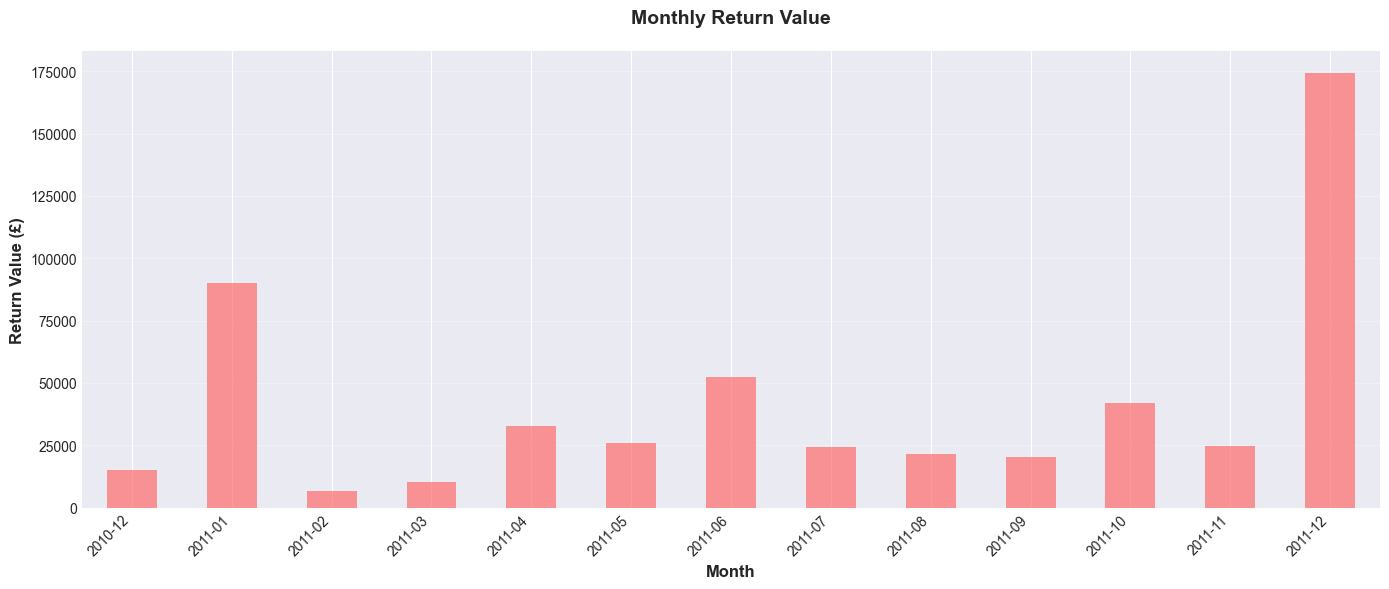

In [11]:
# ┌────────────────────────────────────────────────────────────┐
# │ Return Transaction Analysis                               │
# └────────────────────────────────────────────────────────────┘

# Calculate return metrics
returns['ReturnValue'] = abs(returns['Quantity'] * returns['UnitPrice'])
returns_by_month = returns.groupby(returns['InvoiceDate'].dt.to_period('M'))['ReturnValue'].sum()

print("Return Transaction Summary:")
print("="*80)
print(f"Total return value: £{returns['ReturnValue'].sum():,.2f}")
print(f"Average return value: £{returns['ReturnValue'].mean():.2f}")
print(f"Return rate by value: {returns['ReturnValue'].sum() / purchases['Revenue'].sum() * 100:.2f}%")

# Visualization
fig, ax = plt.subplots(figsize=(14, 6))
returns_by_month.plot(kind='bar', ax=ax, color='#FF6B6B', alpha=0.7)
ax.set_xlabel('Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Return Value (£)', fontsize=12, fontweight='bold')
ax.set_title('Monthly Return Value', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(DIR_FIGURES / '03_return_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

---

## 5. Exploratory Data Analysis

╔════════════════════════════════════════════════════════════════╗
║              EXPLORATORY DATA ANALYSIS (EDA)                    ║
╚════════════════════════════════════════════════════════════════╝

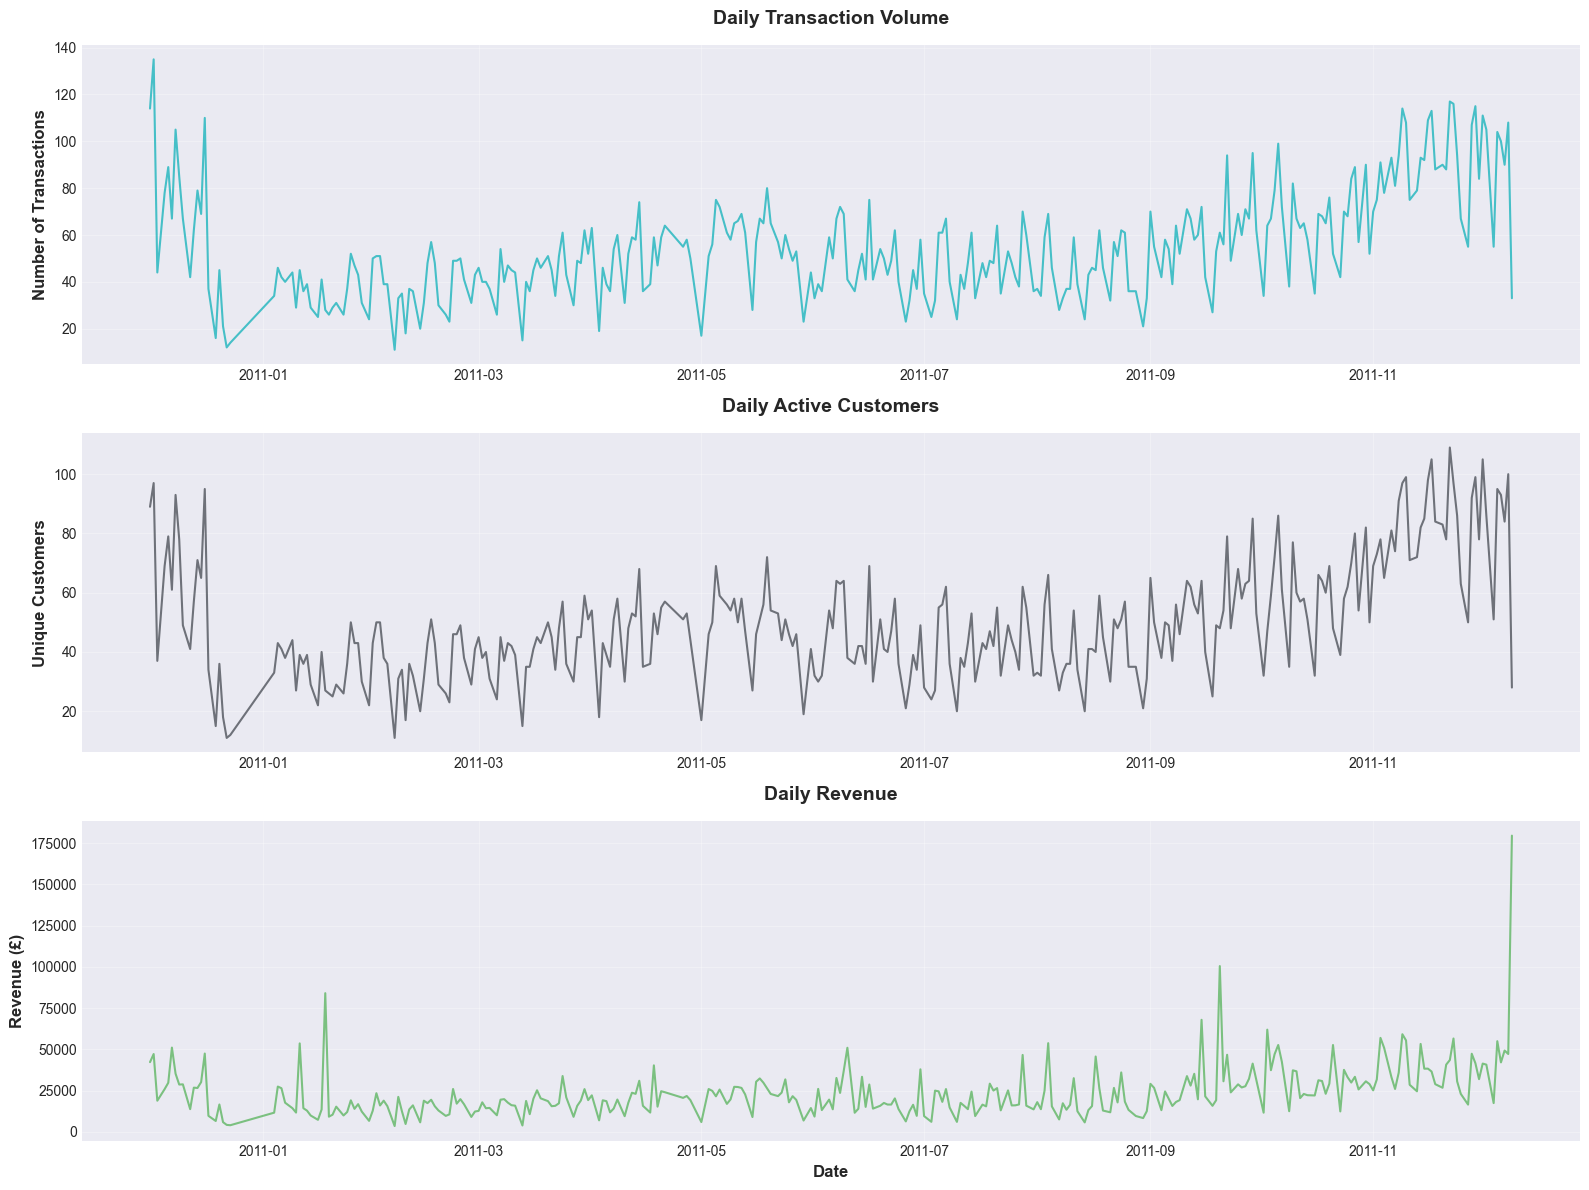

Date range: 2010-12-01 to 2011-12-09
Average daily transactions: 55
Average daily revenue: £23,961.94


In [12]:
# ┌────────────────────────────────────────────────────────────┐
# │ Temporal Patterns: Transaction Volume Over Time           │
# └────────────────────────────────────────────────────────────┘

# Aggregate by day
daily_transactions = purchases.groupby(purchases['InvoiceDate'].dt.date).agg({
    'InvoiceNo': 'nunique',
    'CustomerID': 'nunique',
    'Revenue': 'sum'
}).reset_index()
daily_transactions.columns = ['Date', 'Transactions', 'Customers', 'Revenue']

# Visualization
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Transactions over time
axes[0].plot(daily_transactions['Date'], daily_transactions['Transactions'], 
             color='#00ADB5', linewidth=1.5, alpha=0.7)
axes[0].set_ylabel('Number of Transactions', fontsize=12, fontweight='bold')
axes[0].set_title('Daily Transaction Volume', fontsize=14, fontweight='bold', pad=15)
axes[0].grid(alpha=0.3)

# Unique customers over time
axes[1].plot(daily_transactions['Date'], daily_transactions['Customers'], 
             color='#393E46', linewidth=1.5, alpha=0.7)
axes[1].set_ylabel('Unique Customers', fontsize=12, fontweight='bold')
axes[1].set_title('Daily Active Customers', fontsize=14, fontweight='bold', pad=15)
axes[1].grid(alpha=0.3)

# Revenue over time
axes[2].plot(daily_transactions['Date'], daily_transactions['Revenue'], 
             color='#4CAF50', linewidth=1.5, alpha=0.7)
axes[2].set_ylabel('Revenue (£)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Date', fontsize=12, fontweight='bold')
axes[2].set_title('Daily Revenue', fontsize=14, fontweight='bold', pad=15)
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(DIR_FIGURES / '04_temporal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Date range: {daily_transactions['Date'].min()} to {daily_transactions['Date'].max()}")
print(f"Average daily transactions: {daily_transactions['Transactions'].mean():.0f}")
print(f"Average daily revenue: £{daily_transactions['Revenue'].mean():,.2f}")

Top 20 Products by Revenue:


,Product,TotalQuantity,TotalRevenue,NumOrders
2298,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60,1
2740,REGENCY CAKESTAND 3 TIER,9641,110990.20,1410
3666,WHITE HANGING HEART T-LIGHT HOLDER,34648,94858.60,1884
1975,MEDIUM CERAMIC TOP STORAGE JAR,76919,80291.44,173
1747,JUMBO BAG RED RETROSPOT,41981,77371.57,1447
2324,PARTY BUNTING,13992,63109.38,1290
213,ASSORTED COLOUR BIRD ORNAMENT,32727,52395.99,1300
717,CHILLI LIGHTS,9498,45505.31,508
2292,PAPER CHAIN KIT 50'S CHRISTMAS,14792,40451.08,945
2373,PICNIC BASKET WICKER 60 PIECES,61,39619.50,2


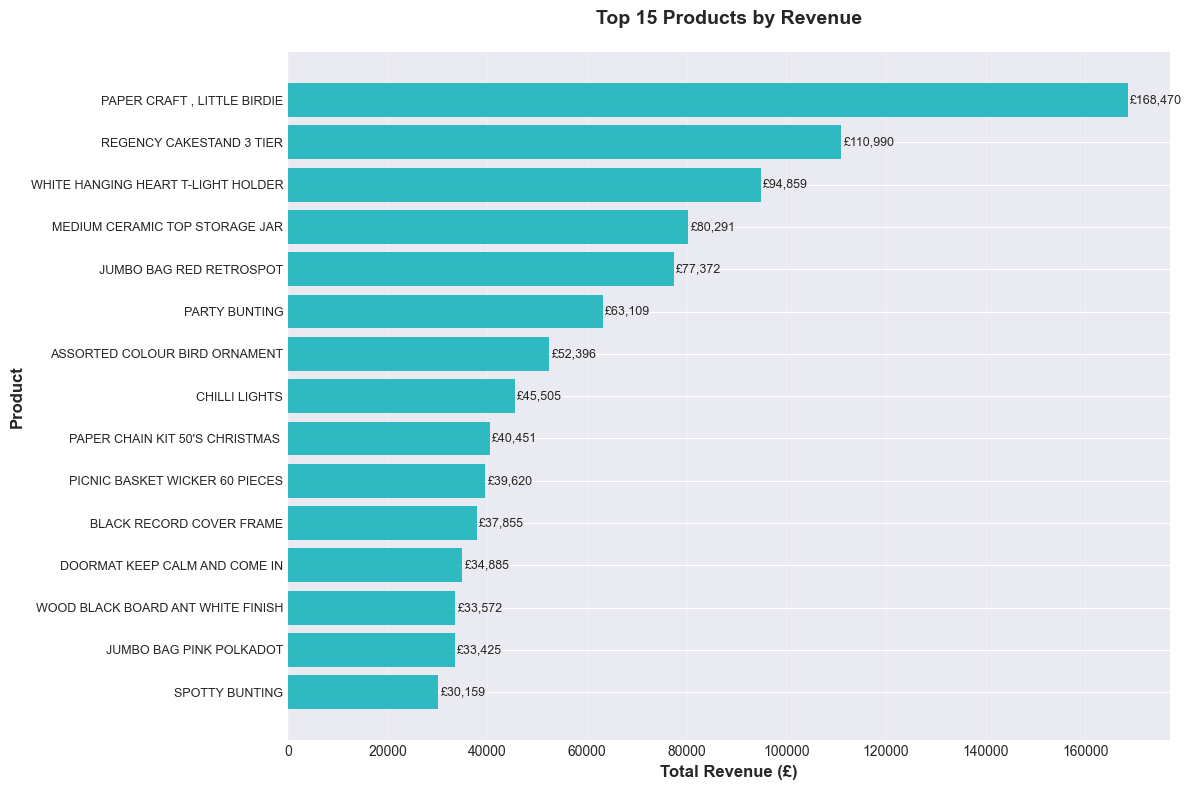

In [13]:
# ┌────────────────────────────────────────────────────────────┐
# │ Product Analysis: Top Products by Revenue                 │
# └────────────────────────────────────────────────────────────┘

# Aggregate by product
product_performance = purchases.groupby('Description').agg({
    'Quantity': 'sum',
    'Revenue': 'sum',
    'InvoiceNo': 'nunique'
}).reset_index()
product_performance.columns = ['Product', 'TotalQuantity', 'TotalRevenue', 'NumOrders']
product_performance = product_performance.sort_values('TotalRevenue', ascending=False)

print("Top 20 Products by Revenue:")
print("="*80)
display(product_performance.head(20))

# Visualization
fig, ax = plt.subplots(figsize=(12, 8))
top_products = product_performance.head(15)
ax.barh(range(len(top_products)), top_products['TotalRevenue'], color='#00ADB5', alpha=0.8)
ax.set_yticks(range(len(top_products)))
ax.set_yticklabels([p[:50] for p in top_products['Product']], fontsize=9)
ax.set_xlabel('Total Revenue (£)', fontsize=12, fontweight='bold')
ax.set_ylabel('Product', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Products by Revenue', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()

# Add value labels
for i, v in enumerate(top_products['TotalRevenue']):
    ax.text(v + 500, i, f'£{v:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig(DIR_FIGURES / '05_top_products.png', dpi=300, bbox_inches='tight')
plt.show()

Customer Purchase Frequency Statistics:
count   3920.00
mean       4.25
std        7.20
min        1.00
25%        1.00
50%        2.00
75%        5.00
max      209.00
Name: InvoiceNo, dtype: float64


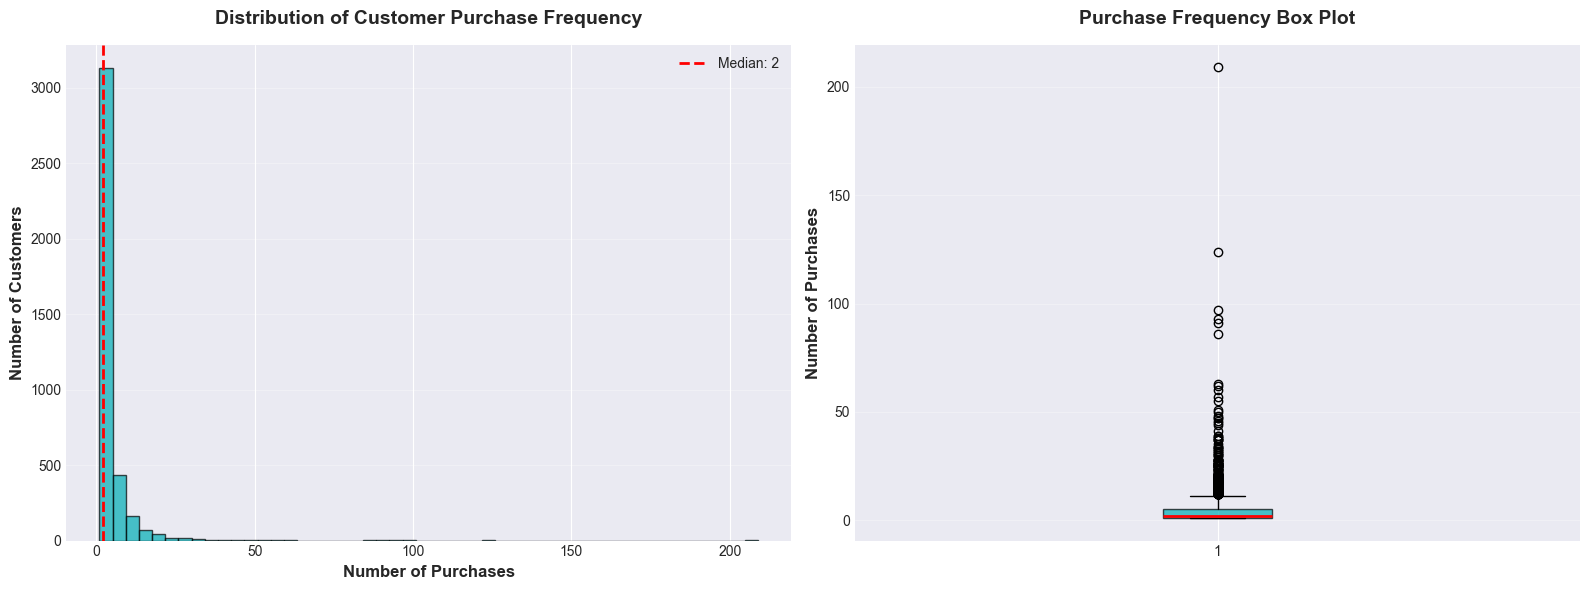


One-time customers: 1,350 (34.44%)
Repeat customers: 2,570 (65.56%)


In [14]:
# ┌────────────────────────────────────────────────────────────┐
# │ Customer Purchase Frequency Distribution                  │
# └────────────────────────────────────────────────────────────┘

# Calculate purchase frequency per customer
customer_frequency = purchases.groupby('CustomerID')['InvoiceNo'].nunique()

print("Customer Purchase Frequency Statistics:")
print("="*80)
print(customer_frequency.describe())

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(customer_frequency, bins=50, color='#00ADB5', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Number of Purchases', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Customers', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Customer Purchase Frequency', fontsize=14, fontweight='bold', pad=15)
axes[0].grid(axis='y', alpha=0.3)
axes[0].axvline(customer_frequency.median(), color='red', linestyle='--', linewidth=2, 
                label=f'Median: {customer_frequency.median():.0f}')
axes[0].legend()

# Box plot
axes[1].boxplot(customer_frequency, vert=True, patch_artist=True,
                boxprops=dict(facecolor='#00ADB5', alpha=0.7),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))
axes[1].set_ylabel('Number of Purchases', fontsize=12, fontweight='bold')
axes[1].set_title('Purchase Frequency Box Plot', fontsize=14, fontweight='bold', pad=15)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(DIR_FIGURES / '06_purchase_frequency.png', dpi=300, bbox_inches='tight')
plt.show()

# One-time vs. repeat customers
one_time = (customer_frequency == 1).sum()
repeat = (customer_frequency > 1).sum()
print(f"\nOne-time customers: {one_time:,} ({one_time/len(customer_frequency)*100:.2f}%)")
print(f"Repeat customers: {repeat:,} ({repeat/len(customer_frequency)*100:.2f}%)")

Customer Revenue Statistics:
count     3920.00
mean      1864.39
std       7482.82
min          3.75
25%        300.28
50%        652.28
75%       1576.59
max     259657.30
Name: Revenue, dtype: float64


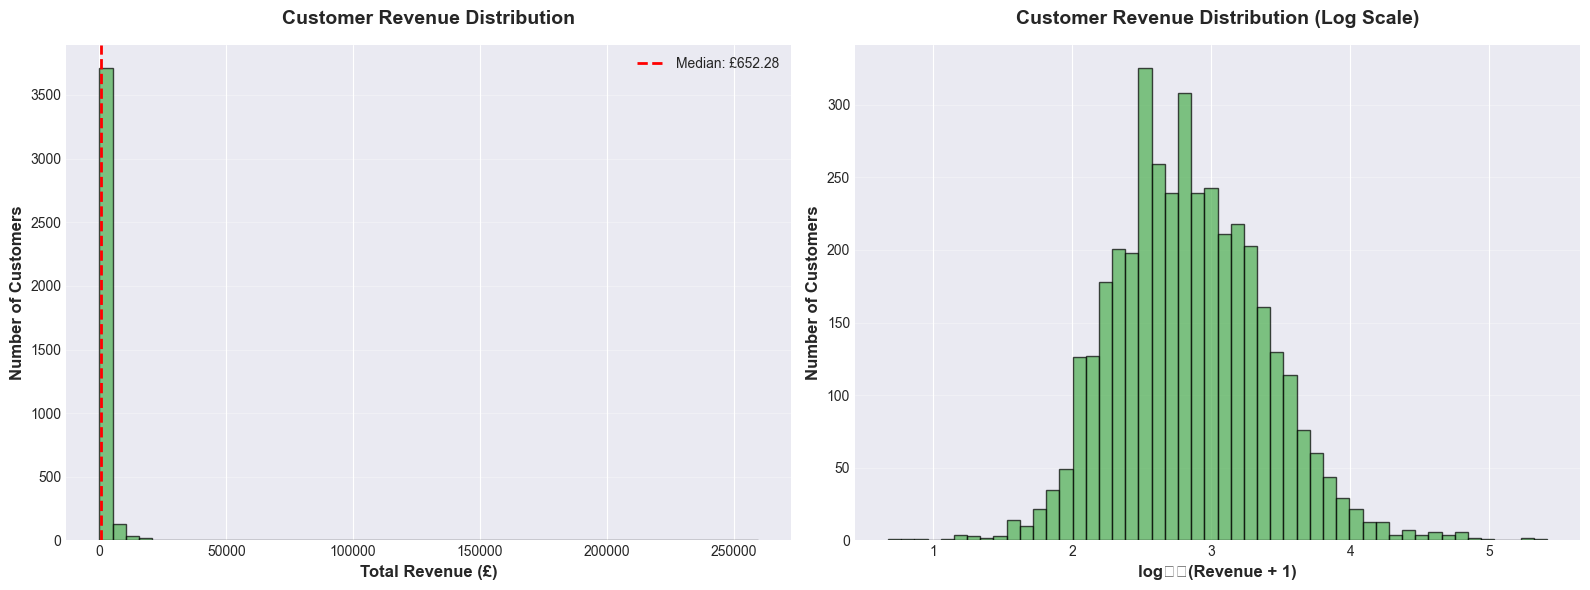


Pareto Principle Analysis:
Top 20% of customers generate 73.33% of revenue


In [15]:
# ┌────────────────────────────────────────────────────────────┐
# │ Revenue Distribution Analysis                             │
# └────────────────────────────────────────────────────────────┘

# Calculate total revenue per customer
customer_revenue = purchases.groupby('CustomerID')['Revenue'].sum()

print("Customer Revenue Statistics:")
print("="*80)
print(customer_revenue.describe())

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Original scale
axes[0].hist(customer_revenue, bins=50, color='#4CAF50', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Total Revenue (£)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Customers', fontsize=12, fontweight='bold')
axes[0].set_title('Customer Revenue Distribution', fontsize=14, fontweight='bold', pad=15)
axes[0].grid(axis='y', alpha=0.3)
axes[0].axvline(customer_revenue.median(), color='red', linestyle='--', linewidth=2,
                label=f'Median: £{customer_revenue.median():.2f}')
axes[0].legend()

# Log scale
axes[1].hist(np.log10(customer_revenue + 1), bins=50, color='#4CAF50', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('log₁₀(Revenue + 1)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Number of Customers', fontsize=12, fontweight='bold')
axes[1].set_title('Customer Revenue Distribution (Log Scale)', fontsize=14, fontweight='bold', pad=15)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(DIR_FIGURES / '07_revenue_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Pareto analysis
sorted_revenue = customer_revenue.sort_values(ascending=False)
cumulative_revenue = sorted_revenue.cumsum() / sorted_revenue.sum() * 100
top_20_pct_customers = int(len(sorted_revenue) * 0.2)
revenue_from_top_20 = cumulative_revenue.iloc[top_20_pct_customers]

print(f"\nPareto Principle Analysis:")
print(f"Top 20% of customers generate {revenue_from_top_20:.2f}% of revenue")

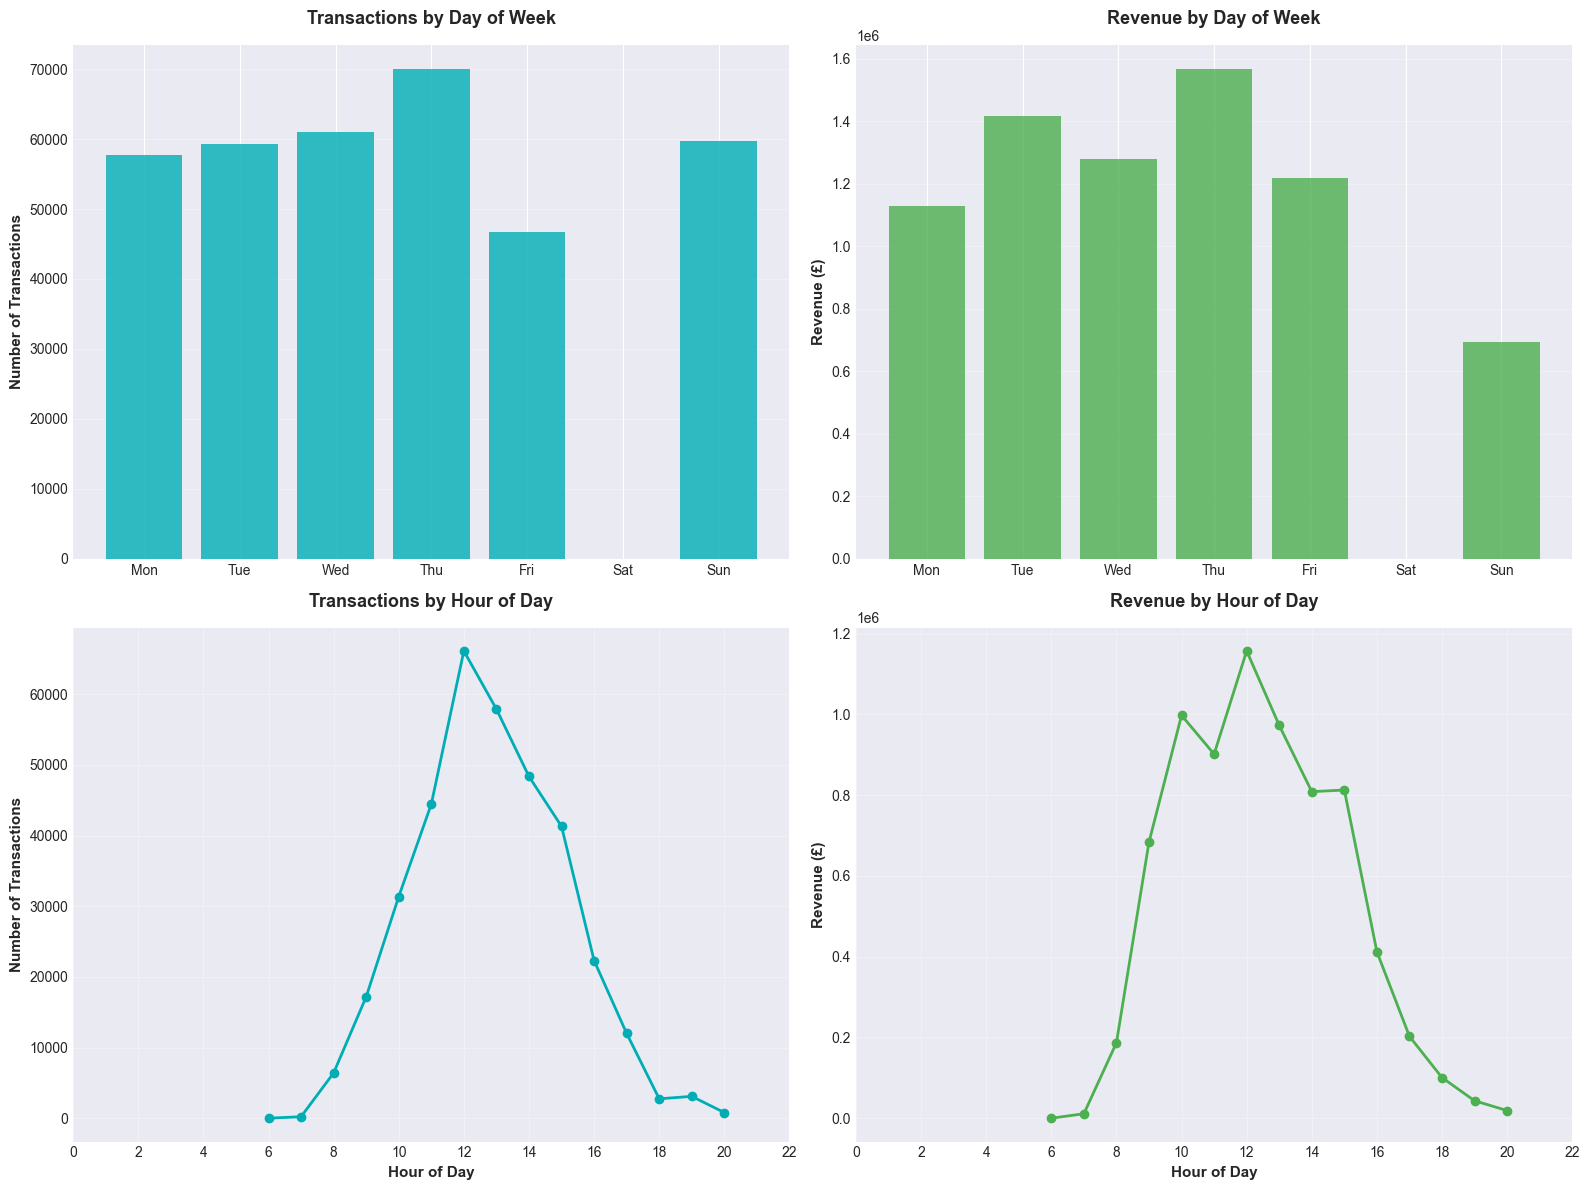

Peak transaction day: Thursday
Peak revenue day: Thursday
Peak transaction hour: 12:00
Peak revenue hour: 12:00


In [16]:
# ┌────────────────────────────────────────────────────────────┐
# │ Temporal Behavior: Day of Week & Hour Patterns           │
# └────────────────────────────────────────────────────────────┘

# Extract temporal features
purchases['DayOfWeek'] = purchases['InvoiceDate'].dt.day_name()
purchases['Hour'] = purchases['InvoiceDate'].dt.hour

# Day of week analysis
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_transactions = purchases.groupby('DayOfWeek').size().reindex(day_order)
dow_revenue = purchases.groupby('DayOfWeek')['Revenue'].sum().reindex(day_order)

# Hour of day analysis
hour_transactions = purchases.groupby('Hour').size()
hour_revenue = purchases.groupby('Hour')['Revenue'].sum()

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Day of week - transactions
axes[0, 0].bar(range(7), dow_transactions.values, color='#00ADB5', alpha=0.8)
axes[0, 0].set_xticks(range(7))
axes[0, 0].set_xticklabels([day[:3] for day in day_order], rotation=0)
axes[0, 0].set_ylabel('Number of Transactions', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Transactions by Day of Week', fontsize=13, fontweight='bold', pad=15)
axes[0, 0].grid(axis='y', alpha=0.3)

# Day of week - revenue
axes[0, 1].bar(range(7), dow_revenue.values, color='#4CAF50', alpha=0.8)
axes[0, 1].set_xticks(range(7))
axes[0, 1].set_xticklabels([day[:3] for day in day_order], rotation=0)
axes[0, 1].set_ylabel('Revenue (£)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Revenue by Day of Week', fontsize=13, fontweight='bold', pad=15)
axes[0, 1].grid(axis='y', alpha=0.3)

# Hour of day - transactions
axes[1, 0].plot(hour_transactions.index, hour_transactions.values, 
                marker='o', color='#00ADB5', linewidth=2, markersize=6)
axes[1, 0].set_xlabel('Hour of Day', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Number of Transactions', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Transactions by Hour of Day', fontsize=13, fontweight='bold', pad=15)
axes[1, 0].grid(alpha=0.3)
axes[1, 0].set_xticks(range(0, 24, 2))

# Hour of day - revenue
axes[1, 1].plot(hour_revenue.index, hour_revenue.values, 
                marker='o', color='#4CAF50', linewidth=2, markersize=6)
axes[1, 1].set_xlabel('Hour of Day', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Revenue (£)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Revenue by Hour of Day', fontsize=13, fontweight='bold', pad=15)
axes[1, 1].grid(alpha=0.3)
axes[1, 1].set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.savefig(DIR_FIGURES / '08_temporal_behavior.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Peak transaction day: {dow_transactions.idxmax()}")
print(f"Peak revenue day: {dow_revenue.idxmax()}")
print(f"Peak transaction hour: {hour_transactions.idxmax()}:00")
print(f"Peak revenue hour: {hour_revenue.idxmax()}:00")

Basket Analysis:

Basket Size (Quantity):
count   16646.00
mean      255.72
std       947.20
min         1.00
25%        72.00
50%       150.00
75%       278.00
max     80995.00
Name: Quantity, dtype: float64

Basket Value (£):
count    16646.00
mean       439.05
std       1663.49
min          0.38
25%        152.95
50%        299.56
75%        444.41
max     168469.60
Name: Revenue, dtype: float64

Unique Items per Basket:
count   16646.00
mean       21.29
std        25.15
min         1.00
25%         6.00
50%        15.00
75%        27.00
max       542.00
dtype: float64


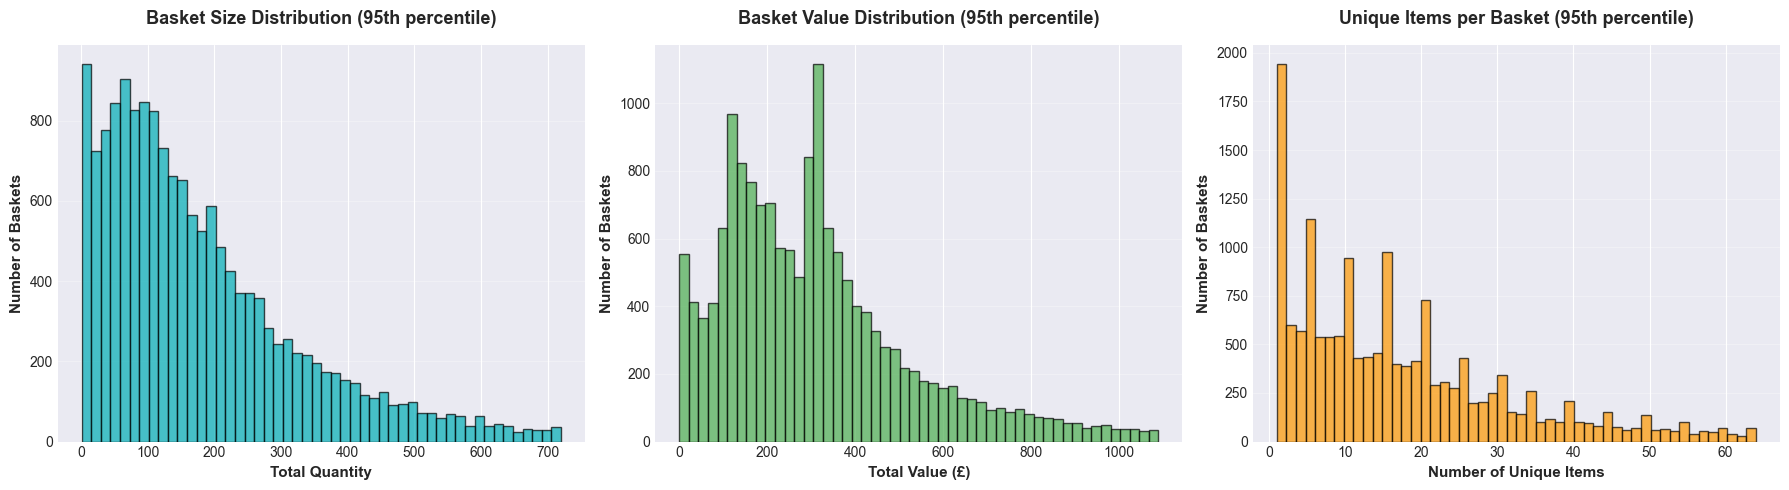

In [17]:
# ┌────────────────────────────────────────────────────────────┐
# │ Basket Size Analysis                                       │
# └────────────────────────────────────────────────────────────┘

# Calculate items per basket
basket_size = purchases.groupby('InvoiceNo')['Quantity'].sum()
basket_value = purchases.groupby('InvoiceNo')['Revenue'].sum()
items_per_basket = purchases.groupby('InvoiceNo').size()

print("Basket Analysis:")
print("="*80)
print(f"\nBasket Size (Quantity):")
print(basket_size.describe())
print(f"\nBasket Value (£):")
print(basket_value.describe())
print(f"\nUnique Items per Basket:")
print(items_per_basket.describe())

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Basket quantity
axes[0].hist(basket_size[basket_size <= basket_size.quantile(0.95)], 
             bins=50, color='#00ADB5', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Total Quantity', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Number of Baskets', fontsize=11, fontweight='bold')
axes[0].set_title('Basket Size Distribution (95th percentile)', fontsize=13, fontweight='bold', pad=15)
axes[0].grid(axis='y', alpha=0.3)

# Basket value
axes[1].hist(basket_value[basket_value <= basket_value.quantile(0.95)], 
             bins=50, color='#4CAF50', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Total Value (£)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Number of Baskets', fontsize=11, fontweight='bold')
axes[1].set_title('Basket Value Distribution (95th percentile)', fontsize=13, fontweight='bold', pad=15)
axes[1].grid(axis='y', alpha=0.3)

# Items per basket
axes[2].hist(items_per_basket[items_per_basket <= items_per_basket.quantile(0.95)], 
             bins=50, color='#FF9800', alpha=0.7, edgecolor='black')
axes[2].set_xlabel('Number of Unique Items', fontsize=11, fontweight='bold')
axes[2].set_ylabel('Number of Baskets', fontsize=11, fontweight='bold')
axes[2].set_title('Unique Items per Basket (95th percentile)', fontsize=13, fontweight='bold', pad=15)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(DIR_FIGURES / '09_basket_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

---

## 6. Temporal Split Creation

╔════════════════════════════════════════════════════════════════╗
║                   TEMPORAL DATA SPLITTING                       ║
╚════════════════════════════════════════════════════════════════╝

### Split Strategy:
- **Training Period:** December 1, 2009 - December 31, 2010 (13 months)
- **Validation Period:** January 1, 2011 - December 9, 2011 (11+ months)

This temporal split ensures:
1. No data leakage (future information not used in training)
2. Realistic validation (predict future customer behavior)
3. Sufficient data in both splits for robust modeling

In [18]:
# ┌────────────────────────────────────────────────────────────┐
# │ Create Temporal Splits                                     │
# └────────────────────────────────────────────────────────────┘

# Define split date
SPLIT_DATE = pd.Timestamp('2011-01-01')

# Create splits
train_data = purchases[purchases['InvoiceDate'] < SPLIT_DATE].copy()
validation_data = purchases[purchases['InvoiceDate'] >= SPLIT_DATE].copy()

print("Temporal Split Summary:")
print("="*80)
print(f"\nSplit Date: {SPLIT_DATE.date()}")
print(f"\nTraining Set:")
print(f"  Date range: {train_data['InvoiceDate'].min()} to {train_data['InvoiceDate'].max()}")
print(f"  Transactions: {len(train_data):,}")
print(f"  Unique customers: {train_data['CustomerID'].nunique():,}")
print(f"  Total revenue: £{train_data['Revenue'].sum():,.2f}")

print(f"\nValidation Set:")
print(f"  Date range: {validation_data['InvoiceDate'].min()} to {validation_data['InvoiceDate'].max()}")
print(f"  Transactions: {len(validation_data):,}")
print(f"  Unique customers: {validation_data['CustomerID'].nunique():,}")
print(f"  Total revenue: £{validation_data['Revenue'].sum():,.2f}")

# Check for customer overlap
train_customers = set(train_data['CustomerID'].unique())
val_customers = set(validation_data['CustomerID'].unique())
overlap = train_customers.intersection(val_customers)
new_customers_val = val_customers - train_customers

print(f"\nCustomer Overlap Analysis:")
print(f"  Customers in both sets: {len(overlap):,} ({len(overlap)/len(val_customers)*100:.2f}% of validation)")
print(f"  New customers in validation: {len(new_customers_val):,} ({len(new_customers_val)/len(val_customers)*100:.2f}%)")

Temporal Split Summary:

Split Date: 2011-01-01

Training Set:
  Date range: 2010-12-01 08:26:00 to 2010-12-23 16:06:00
  Transactions: 23,942
  Unique customers: 815
  Total revenue: £498,661.85

Validation Set:
  Date range: 2011-01-04 10:00:00 to 2011-12-09 12:49:00
  Transactions: 330,379
  Unique customers: 3,813
  Total revenue: £6,809,729.70

Customer Overlap Analysis:
  Customers in both sets: 708 (18.57% of validation)
  New customers in validation: 3,105 (81.43%)


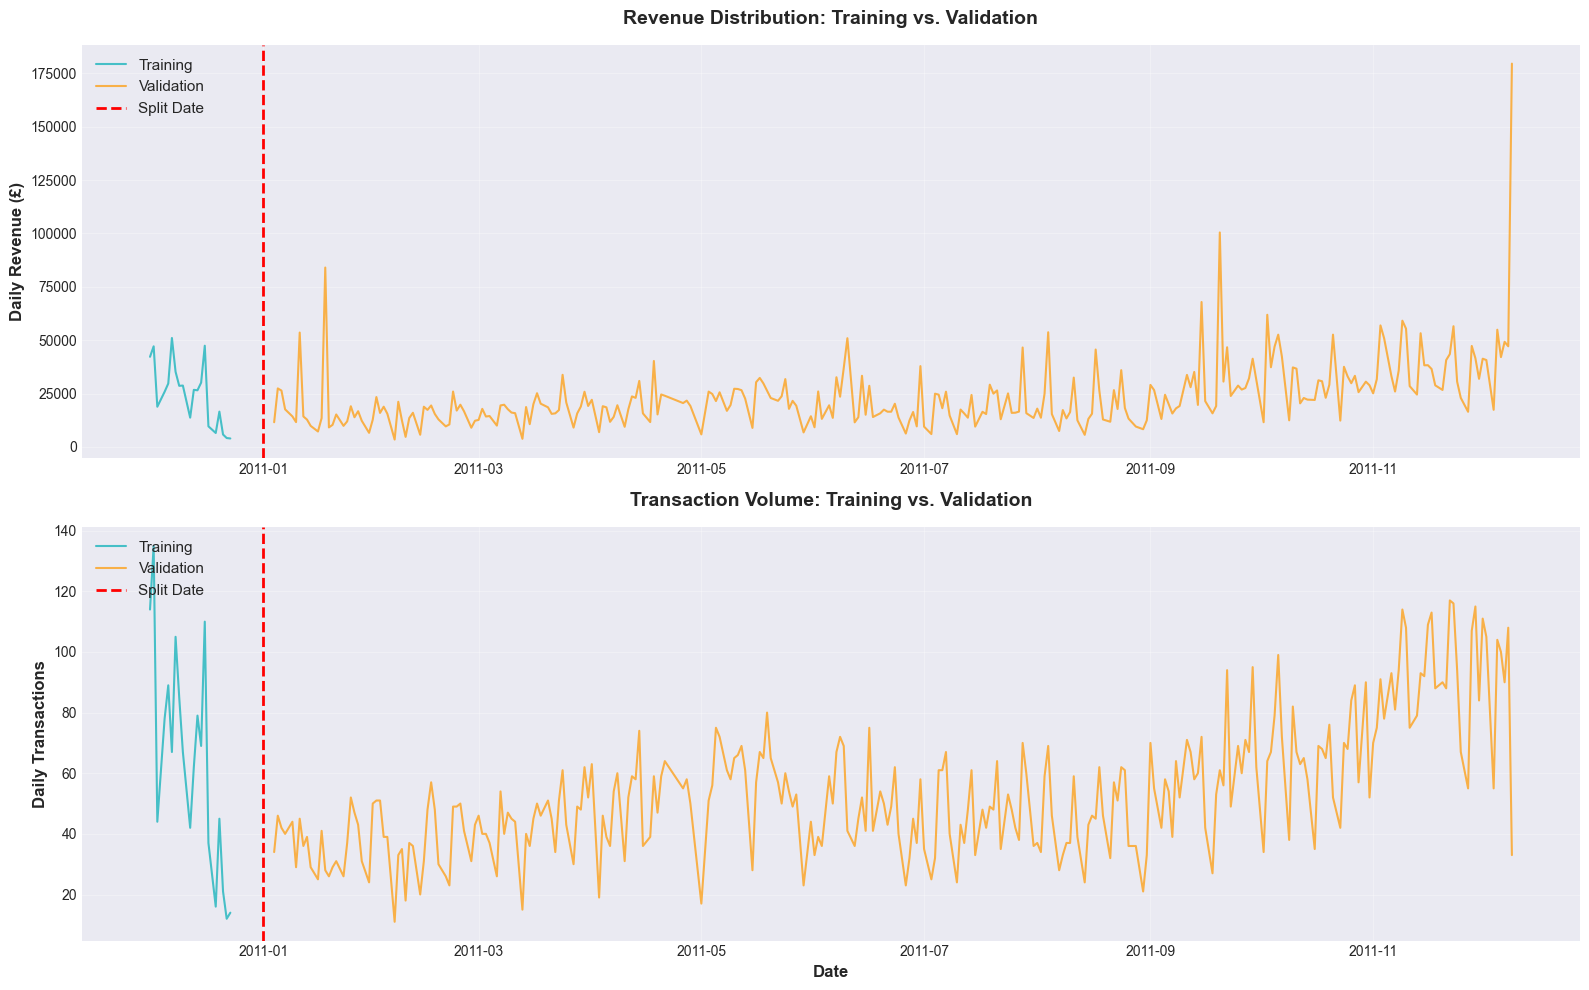

In [19]:
# ┌────────────────────────────────────────────────────────────┐
# │ Visualize Temporal Coverage                               │
# └────────────────────────────────────────────────────────────┘

# Aggregate daily metrics for both sets
train_daily = train_data.groupby(train_data['InvoiceDate'].dt.date).agg({
    'Revenue': 'sum',
    'InvoiceNo': 'nunique'
}).reset_index()
train_daily['Set'] = 'Training'

val_daily = validation_data.groupby(validation_data['InvoiceDate'].dt.date).agg({
    'Revenue': 'sum',
    'InvoiceNo': 'nunique'
}).reset_index()
val_daily['Set'] = 'Validation'

combined_daily = pd.concat([train_daily, val_daily], ignore_index=True)

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Revenue over time
train_rev = train_daily[['InvoiceDate', 'Revenue']]
val_rev = val_daily[['InvoiceDate', 'Revenue']]

axes[0].plot(train_rev['InvoiceDate'], train_rev['Revenue'], 
             color='#00ADB5', linewidth=1.5, alpha=0.7, label='Training')
axes[0].plot(val_rev['InvoiceDate'], val_rev['Revenue'], 
             color='#FF9800', linewidth=1.5, alpha=0.7, label='Validation')
axes[0].axvline(SPLIT_DATE.date(), color='red', linestyle='--', linewidth=2, label='Split Date')
axes[0].set_ylabel('Daily Revenue (£)', fontsize=12, fontweight='bold')
axes[0].set_title('Revenue Distribution: Training vs. Validation', fontsize=14, fontweight='bold', pad=15)
axes[0].legend(loc='upper left', fontsize=11)
axes[0].grid(alpha=0.3)

# Transaction count over time
train_txn = train_daily[['InvoiceDate', 'InvoiceNo']]
val_txn = val_daily[['InvoiceDate', 'InvoiceNo']]

axes[1].plot(train_txn['InvoiceDate'], train_txn['InvoiceNo'], 
             color='#00ADB5', linewidth=1.5, alpha=0.7, label='Training')
axes[1].plot(val_txn['InvoiceDate'], val_txn['InvoiceNo'], 
             color='#FF9800', linewidth=1.5, alpha=0.7, label='Validation')
axes[1].axvline(SPLIT_DATE.date(), color='red', linestyle='--', linewidth=2, label='Split Date')
axes[1].set_xlabel('Date', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Daily Transactions', fontsize=12, fontweight='bold')
axes[1].set_title('Transaction Volume: Training vs. Validation', fontsize=14, fontweight='bold', pad=15)
axes[1].legend(loc='upper left', fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(DIR_FIGURES / '10_temporal_split.png', dpi=300, bbox_inches='tight')
plt.show()

---

## 7. RFM Feature Engineering

╔════════════════════════════════════════════════════════════════╗
║                 RFM FEATURE ENGINEERING                         ║
╚════════════════════════════════════════════════════════════════╝

### RFM Framework:
- **Recency (R):** Days since last purchase (from end of training period)
- **Frequency (F):** Number of purchases during training period
- **Monetary (M):** Total revenue during training period

Additional features:
- First purchase date (customer tenure)
- Average order value
- Average basket size

In [20]:
# ┌────────────────────────────────────────────────────────────┐
# │ Calculate Traditional RFM Features                        │
# └────────────────────────────────────────────────────────────┘

# Reference date (end of training period)
REFERENCE_DATE = train_data['InvoiceDate'].max()

print(f"RFM Reference Date: {REFERENCE_DATE}")
print("\nCalculating RFM features...\n")

# Calculate RFM metrics
rfm = train_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (REFERENCE_DATE - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'Revenue': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Additional features
customer_details = train_data.groupby('CustomerID').agg({
    'InvoiceDate': ['min', 'max'],
    'Revenue': 'mean',
    'Quantity': 'mean'
}).reset_index()

customer_details.columns = ['CustomerID', 'FirstPurchase', 'LastPurchase', 
                            'AvgOrderValue', 'AvgBasketSize']

# Calculate tenure
customer_details['Tenure'] = (customer_details['LastPurchase'] - 
                              customer_details['FirstPurchase']).dt.days

# Merge all features
rfm = rfm.merge(customer_details, on='CustomerID', how='left')

print("✅ RFM features calculated")
print(f"   Total customers: {len(rfm):,}")
print(f"\nRFM Summary Statistics:")
print("="*80)
display(rfm[['Recency', 'Frequency', 'Monetary', 'Tenure', 'AvgOrderValue', 'AvgBasketSize']].describe())

RFM Reference Date: 2010-12-23 16:06:00

Calculating RFM features...

✅ RFM features calculated
   Total customers: 815

RFM Summary Statistics:


,Recency,Frequency,Monetary,Tenure,AvgOrderValue,AvgBasketSize
count,815.00,815.00,815.00,815.00,815.00,815.00
mean,12.20,1.58,611.86,2.26,42.39,27.20
std,5.94,1.95,1461.28,4.71,103.29,120.85
min,0.00,1.00,15.00,0.00,1.62,1.00
25%,7.00,1.00,197.10,0.00,11.11,4.80
50%,13.00,1.00,321.46,0.00,18.63,9.31
75%,17.00,2.00,548.80,0.00,31.74,15.70
max,22.00,35.00,27834.61,22.00,1546.37,2140.00


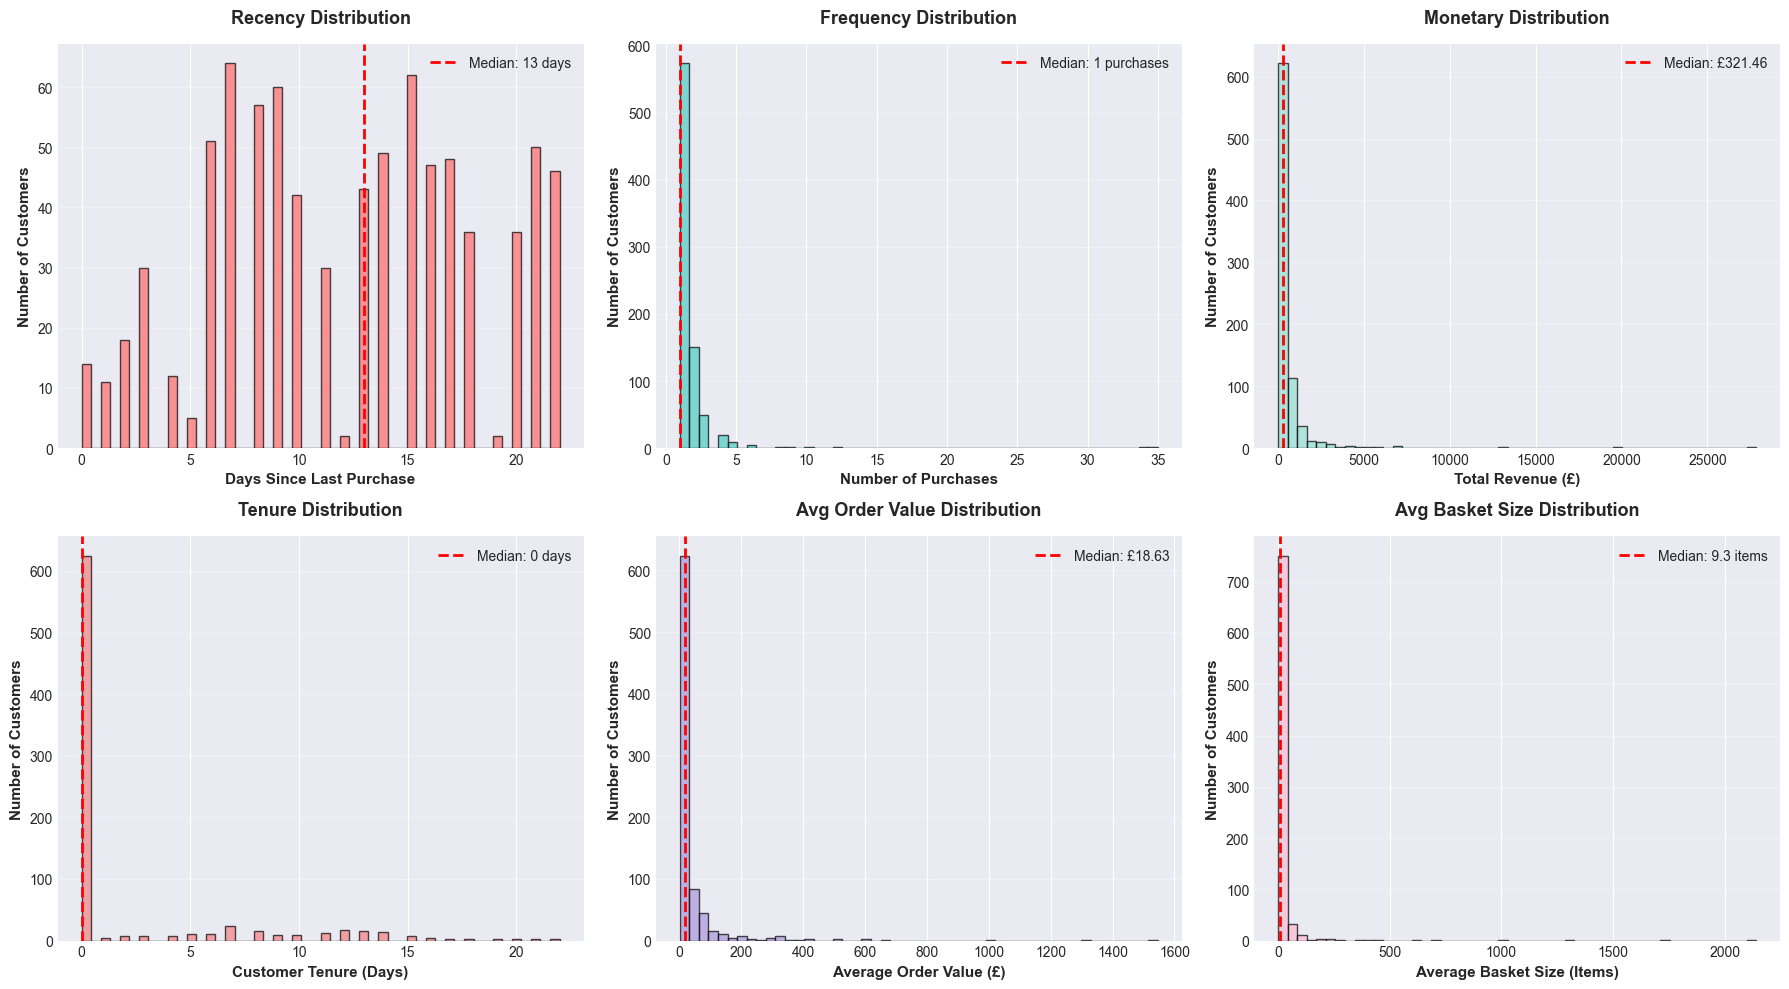

In [21]:
# ┌────────────────────────────────────────────────────────────┐
# │ RFM Distribution Visualizations                           │
# └────────────────────────────────────────────────────────────┘

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Recency
axes[0, 0].hist(rfm['Recency'], bins=50, color='#FF6B6B', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Days Since Last Purchase', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Number of Customers', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Recency Distribution', fontsize=13, fontweight='bold', pad=15)
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].axvline(rfm['Recency'].median(), color='red', linestyle='--', linewidth=2,
                   label=f"Median: {rfm['Recency'].median():.0f} days")
axes[0, 0].legend()

# Frequency
axes[0, 1].hist(rfm['Frequency'], bins=50, color='#4ECDC4', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Number of Purchases', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Number of Customers', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Frequency Distribution', fontsize=13, fontweight='bold', pad=15)
axes[0, 1].grid(axis='y', alpha=0.3)
axes[0, 1].axvline(rfm['Frequency'].median(), color='red', linestyle='--', linewidth=2,
                   label=f"Median: {rfm['Frequency'].median():.0f} purchases")
axes[0, 1].legend()

# Monetary
axes[0, 2].hist(rfm['Monetary'], bins=50, color='#95E1D3', alpha=0.7, edgecolor='black')
axes[0, 2].set_xlabel('Total Revenue (£)', fontsize=11, fontweight='bold')
axes[0, 2].set_ylabel('Number of Customers', fontsize=11, fontweight='bold')
axes[0, 2].set_title('Monetary Distribution', fontsize=13, fontweight='bold', pad=15)
axes[0, 2].grid(axis='y', alpha=0.3)
axes[0, 2].axvline(rfm['Monetary'].median(), color='red', linestyle='--', linewidth=2,
                   label=f"Median: £{rfm['Monetary'].median():.2f}")
axes[0, 2].legend()

# Tenure
axes[1, 0].hist(rfm['Tenure'], bins=50, color='#F38181', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Customer Tenure (Days)', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Number of Customers', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Tenure Distribution', fontsize=13, fontweight='bold', pad=15)
axes[1, 0].grid(axis='y', alpha=0.3)
axes[1, 0].axvline(rfm['Tenure'].median(), color='red', linestyle='--', linewidth=2,
                   label=f"Median: {rfm['Tenure'].median():.0f} days")
axes[1, 0].legend()

# Average Order Value
axes[1, 1].hist(rfm['AvgOrderValue'], bins=50, color='#AA96DA', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Average Order Value (£)', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Number of Customers', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Avg Order Value Distribution', fontsize=13, fontweight='bold', pad=15)
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].axvline(rfm['AvgOrderValue'].median(), color='red', linestyle='--', linewidth=2,
                   label=f"Median: £{rfm['AvgOrderValue'].median():.2f}")
axes[1, 1].legend()

# Average Basket Size
axes[1, 2].hist(rfm['AvgBasketSize'], bins=50, color='#FCBAD3', alpha=0.7, edgecolor='black')
axes[1, 2].set_xlabel('Average Basket Size (Items)', fontsize=11, fontweight='bold')
axes[1, 2].set_ylabel('Number of Customers', fontsize=11, fontweight='bold')
axes[1, 2].set_title('Avg Basket Size Distribution', fontsize=13, fontweight='bold', pad=15)
axes[1, 2].grid(axis='y', alpha=0.3)
axes[1, 2].axvline(rfm['AvgBasketSize'].median(), color='red', linestyle='--', linewidth=2,
                   label=f"Median: {rfm['AvgBasketSize'].median():.1f} items")
axes[1, 2].legend()

plt.tight_layout()
plt.savefig(DIR_FIGURES / '11_rfm_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

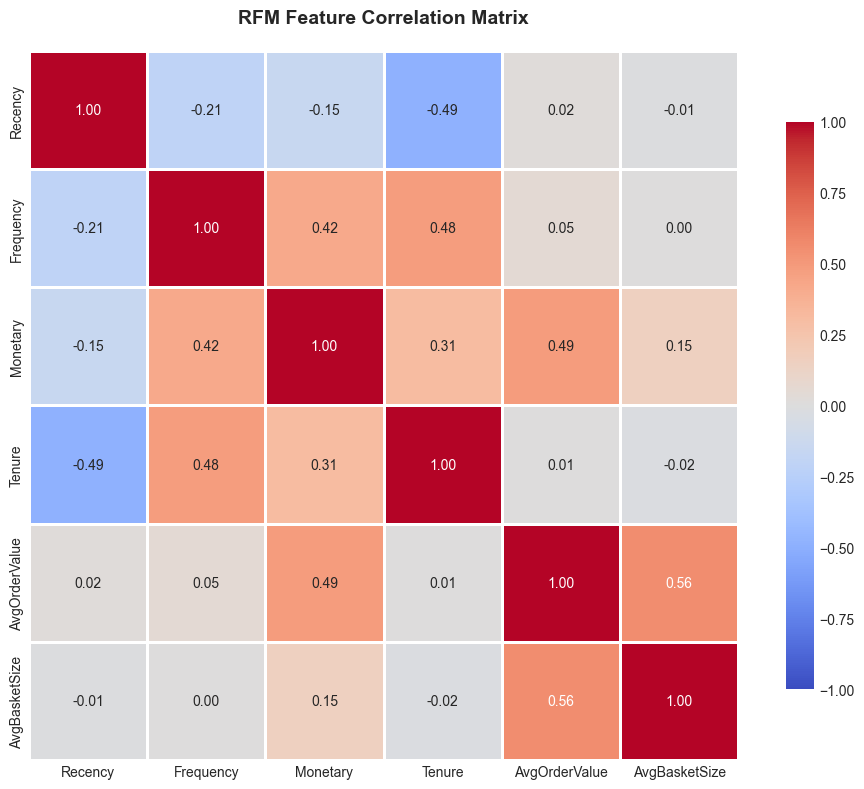

Key Correlations:
AvgBasketSize  AvgOrderValue   0.56
AvgOrderValue  AvgBasketSize   0.56
               Monetary        0.49
Monetary       AvgOrderValue   0.49
Frequency      Tenure          0.48
Tenure         Frequency       0.48
Frequency      Monetary        0.42
Monetary       Frequency       0.42
               Tenure          0.31
Tenure         Monetary        0.31
dtype: float64


In [22]:
# ┌────────────────────────────────────────────────────────────┐
# │ RFM Correlation Analysis                                  │
# └────────────────────────────────────────────────────────────┘

# Calculate correlations
rfm_numeric = rfm[['Recency', 'Frequency', 'Monetary', 'Tenure', 'AvgOrderValue', 'AvgBasketSize']]
correlation_matrix = rfm_numeric.corr()

# Visualization
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax)
ax.set_title('RFM Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(DIR_FIGURES / '12_rfm_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("Key Correlations:")
print("="*80)
# Get top correlations (excluding diagonal)
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1.0].sort_values(ascending=False)
print(corr_pairs.head(10))

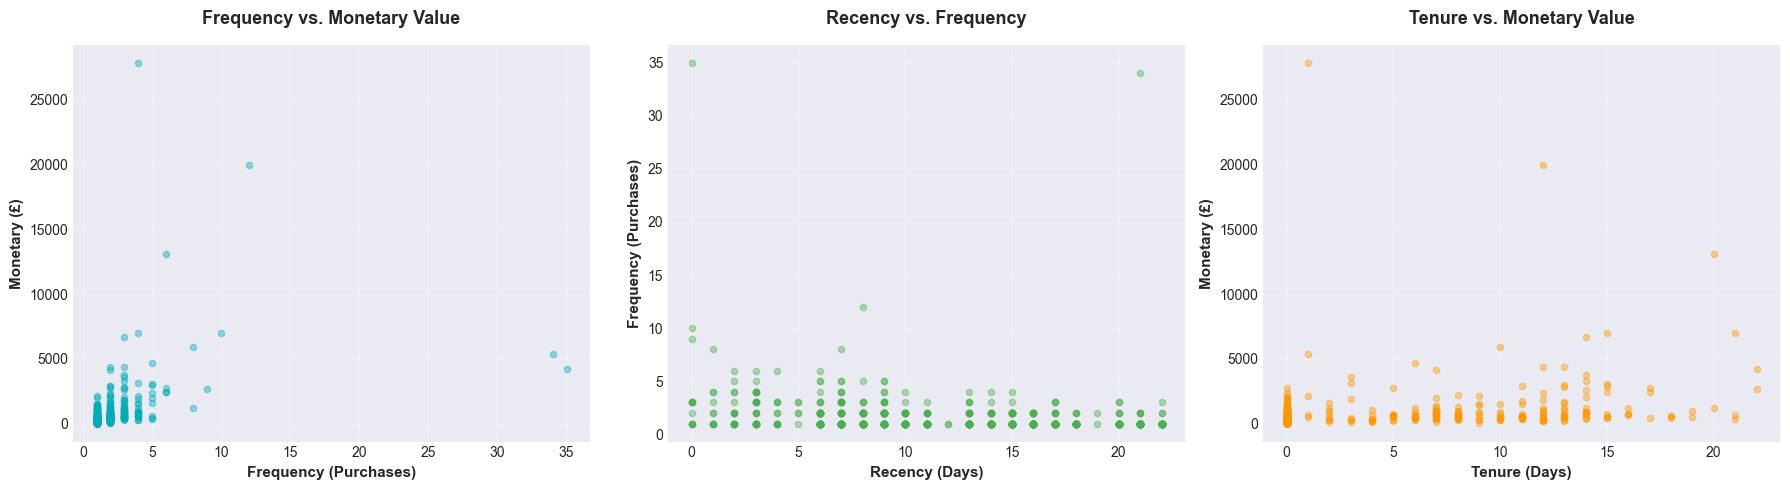

In [23]:
# ┌────────────────────────────────────────────────────────────┐
# │ RFM Scatter Plots (Key Relationships)                     │
# └────────────────────────────────────────────────────────────┘

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Frequency vs. Monetary
axes[0].scatter(rfm['Frequency'], rfm['Monetary'], alpha=0.4, color='#00ADB5', s=20)
axes[0].set_xlabel('Frequency (Purchases)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Monetary (£)', fontsize=11, fontweight='bold')
axes[0].set_title('Frequency vs. Monetary Value', fontsize=13, fontweight='bold', pad=15)
axes[0].grid(alpha=0.3)

# Recency vs. Frequency
axes[1].scatter(rfm['Recency'], rfm['Frequency'], alpha=0.4, color='#4CAF50', s=20)
axes[1].set_xlabel('Recency (Days)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Frequency (Purchases)', fontsize=11, fontweight='bold')
axes[1].set_title('Recency vs. Frequency', fontsize=13, fontweight='bold', pad=15)
axes[1].grid(alpha=0.3)

# Tenure vs. Monetary
axes[2].scatter(rfm['Tenure'], rfm['Monetary'], alpha=0.4, color='#FF9800', s=20)
axes[2].set_xlabel('Tenure (Days)', fontsize=11, fontweight='bold')
axes[2].set_ylabel('Monetary (£)', fontsize=11, fontweight='bold')
axes[2].set_title('Tenure vs. Monetary Value', fontsize=13, fontweight='bold', pad=15)
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(DIR_FIGURES / '13_rfm_relationships.png', dpi=300, bbox_inches='tight')
plt.show()

---

## 8. Export Processed Data

╔════════════════════════════════════════════════════════════════╗
║                    EXPORT PROCESSED DATA                        ║
╚════════════════════════════════════════════════════════════════╝

In [24]:
# ┌────────────────────────────────────────────────────────────┐
# │ Export Datasets                                            │
# └────────────────────────────────────────────────────────────┘

print("Exporting processed datasets...\n")

# Export temporal splits
train_data.to_csv(DIR_DATA_PROCESSED / 'train.csv', index=False)
print(f"✅ Training data exported: {len(train_data):,} rows")

validation_data.to_csv(DIR_DATA_PROCESSED / 'validation.csv', index=False)
print(f"✅ Validation data exported: {len(validation_data):,} rows")

# Export full cleaned dataset
purchases.to_csv(DIR_DATA_PROCESSED / 'cleaned_data.csv', index=False)
print(f"✅ Full cleaned data exported: {len(purchases):,} rows")

# Export RFM features
rfm.to_csv(DIR_DATA_PROCESSED / 'rfm_features.csv', index=False)
print(f"✅ RFM features exported: {len(rfm):,} customers")

print("\n" + "="*80)
print("All datasets exported to:", DIR_DATA_PROCESSED)
print("="*80)

Exporting processed datasets...

✅ Training data exported: 23,942 rows
✅ Validation data exported: 330,379 rows
✅ Full cleaned data exported: 354,321 rows
✅ RFM features exported: 815 customers

All datasets exported to: d:\Courses\Workstation\Github\Working Projects\GitHub Project 3 - Customer Churn\Customer_Segmentation_Retention_Analysis\data\processed


In [26]:
# ┌────────────────────────────────────────────────────────────┐
# │ Final Summary Statistics                                  │
# └────────────────────────────────────────────────────────────┘

summary = {
    'Metric': [
        'Total Transactions (Original)',
        'Total Transactions (Cleaned)',
        'Unique Customers',
        'Date Range',
        'Total Revenue',
        'Training Transactions',
        'Validation Transactions',
        'Training Customers',
        'Validation Customers',
        'Customer Overlap',
        'Avg Purchase Frequency',
        'Avg Customer Lifetime Value',
        'One-time Customers',
        'Repeat Customers'
    ],
    'Value': [
        f"{len(df_raw):,}",
        f"{len(purchases):,}",
        f"{purchases['CustomerID'].nunique():,}",
        f"{purchases['InvoiceDate'].min().date()} to {purchases['InvoiceDate'].max().date()}",
        f"£{purchases['Revenue'].sum():,.2f}",
        f"{len(train_data):,}",
        f"{len(validation_data):,}",
        f"{train_data['CustomerID'].nunique():,}",
        f"{validation_data['CustomerID'].nunique():,}",
        f"{len(overlap):,} ({len(overlap)/len(val_customers)*100:.1f}%)",
        f"{rfm['Frequency'].mean():.2f} purchases",
        f"£{rfm['Monetary'].mean():.2f}",
        f"{(rfm['Frequency'] == 1).sum():,} ({(rfm['Frequency'] == 1).sum()/len(rfm)*100:.1f}%)",
        f"{(rfm['Frequency'] > 1).sum():,} ({(rfm['Frequency'] > 1).sum()/len(rfm)*100:.1f}%)"
    ]
}

summary_df = pd.DataFrame(summary)

print("\n" + "="*80)
print("DATA PREPARATION SUMMARY")
print("="*80)
display(summary_df)

# Save summary
summary_df.to_csv(DIR_RESULTS / 'outputs' / 'data_summary.csv', index=False)
print("\n✅ Summary saved to:", DIR_RESULTS / 'data_summary.csv')


DATA PREPARATION SUMMARY


,Metric,Value
0,Total Transactions (Original),"541,909"
1,Total Transactions (Cleaned),"354,321"
2,Unique Customers,"3,920"
3,Date Range,2010-12-01 to 2011-12-09
4,Total Revenue,"£7,308,391.55"
5,Training Transactions,"23,942"
6,Validation Transactions,"330,379"
7,Training Customers,815
8,Validation Customers,"3,813"
9,Customer Overlap,708 (18.6%)



✅ Summary saved to: d:\Courses\Workstation\Github\Working Projects\GitHub Project 3 - Customer Churn\Customer_Segmentation_Retention_Analysis\results\data_summary.csv


---

## 📊 Data Exploration Complete!

### ✅ Accomplishments:

1. **Data Loading & Quality Assessment**
   - Loaded UCI Online Retail dataset
   - Identified and documented data quality issues
   - Handled missing values, returns, and invalid entries

2. **Data Cleaning**
   - Filtered to UK market (domain coherence)
   - Removed invalid prices and missing CustomerIDs
   - Separated returns from purchases
   - Created revenue column

3. **Exploratory Data Analysis**
   - Temporal patterns (daily, weekly, hourly)
   - Product performance analysis
   - Customer behavior patterns
   - Basket size analysis
   - Generated 13+ high-quality visualizations

4. **Temporal Split Creation**
   - Training: Dec 2009 - Dec 2010
   - Validation: Jan 2011 - Dec 2011
   - No data leakage

5. **RFM Feature Engineering**
   - Traditional RFM metrics calculated
   - Additional features: tenure, avg order value, basket size
   - Correlation analysis completed

### 📁 Files Created:
- `data/processed/train.csv`
- `data/processed/validation.csv`
- `data/processed/cleaned_data.csv`
- `data/processed/rfm_features.csv`
- `results/figures/` (13 visualizations)
- `results/data_summary.csv`

### 🎯 Next Steps:
Ready to proceed to probabilistic CLV modeling with BG/NBD and Gamma-Gamma models!

---

**Notebook Created By:** Harpinder Singh  
**Date:** January 2026  
**Project:** Customer Retention Analysis - Portfolio Project